# Analysis of Customer Churn in Telecom

### Churn (loss of customers to competition) is a problem for telecom companies because it is expensive to acquire a new customer and companies want to retain their existing customers. Most telecom companies suffer from voluntary churn. Churn rate has a strong impact on the life time value of the customer because it affects the length of service and the future revenue of the company. 

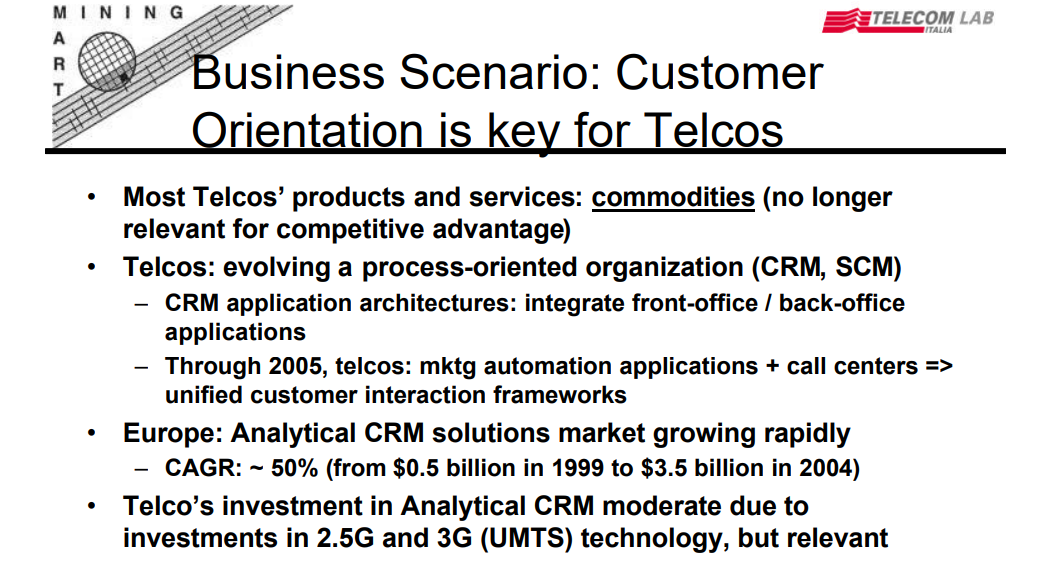

In [45]:
from IPython.display import Image
Image (filename='1.PNG')

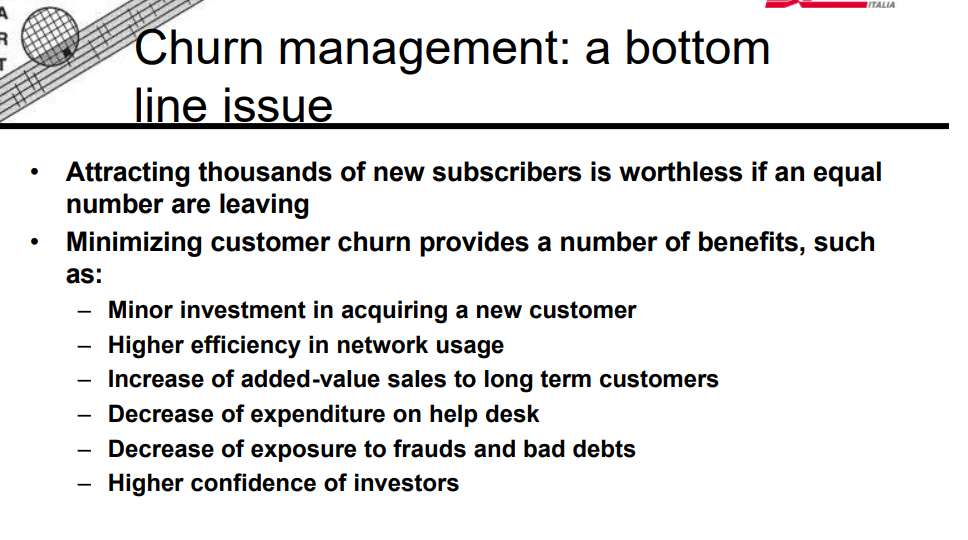

In [46]:
Image (filename='2.PNG')

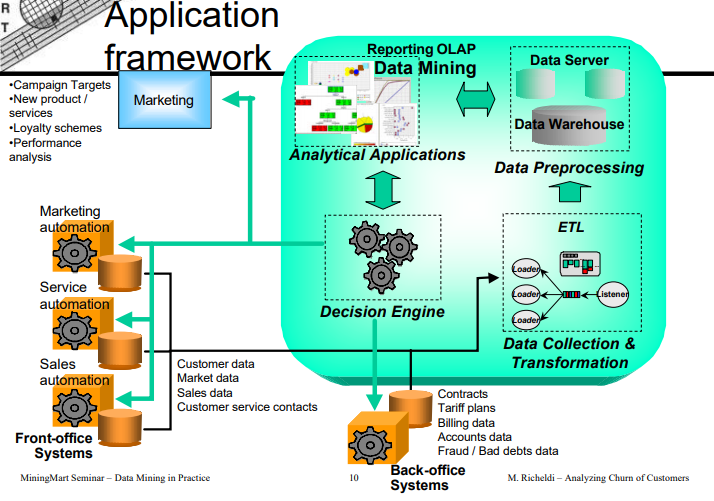

In [48]:
Image(filename="3.PNG")

In [4]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
#import statsmodels.formula.api as sm

from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv("Telco-Customer-Churn-Data.csv")
#df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
col_names = df.columns.tolist()
print('The table has %r rows and %r columns'%df.shape)
print("Column names:", col_names)

The table has 7043 rows and 21 columns
Column names: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [9]:
np.sum(df.isnull())

# checks if there are any null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# checking data types of all columns# checkin 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## First, we will take a look at each individual factor

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


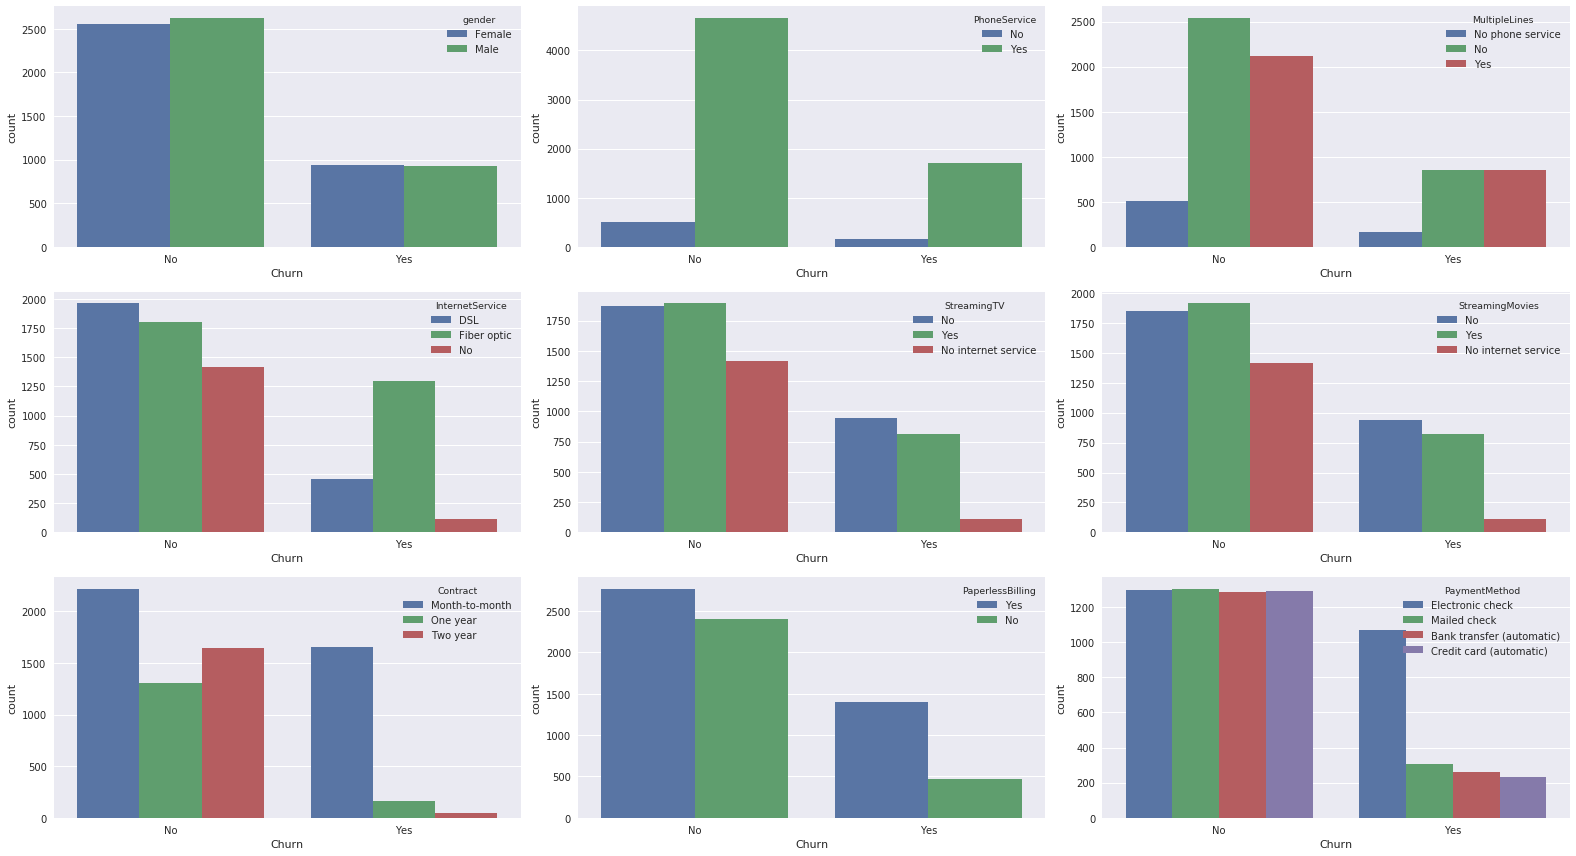

In [12]:
# visualizing churn across different variables
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(22,12))
(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = ax.flatten()
sns.set_style("dark")
sns.countplot(x='Churn', hue='gender', data=df, ax=ax1)
sns.countplot(x='Churn', hue='PhoneService', data=df, ax=ax2)
sns.countplot(x='Churn', hue='MultipleLines', data=df, ax=ax3)
sns.countplot(x='Churn', hue='InternetService', data=df, ax=ax4)
sns.countplot(x='Churn', hue='StreamingTV', data=df, ax=ax5)
sns.countplot(x='Churn', hue='StreamingMovies', data=df, ax=ax6)
sns.countplot(x='Churn', hue='Contract', data=df, ax=ax7)
sns.countplot(x='Churn', hue='PaperlessBilling', data=df, ax=ax8)
sns.countplot(x='Churn', hue='PaymentMethod', data=df, ax=ax9)
fig.tight_layout()

# Plotting tenure for churn

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


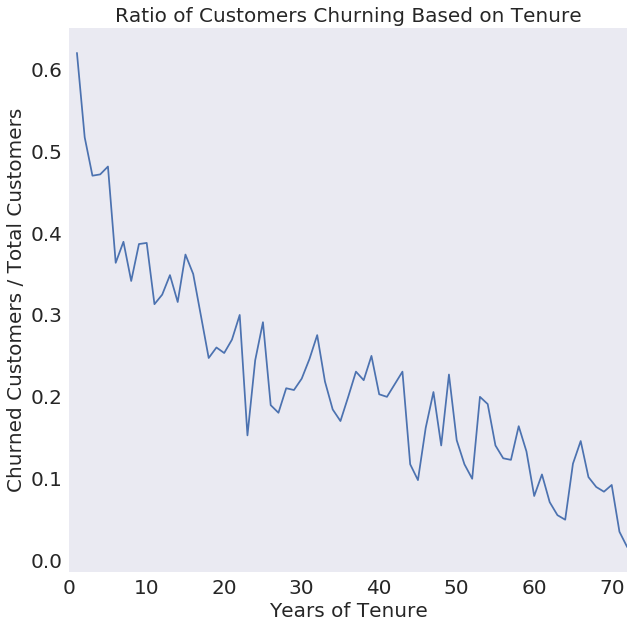

In [20]:
tenure_Churn = df[df.Churn == 'Yes'].groupby('tenure').count()['customerID']
tenure_NC = df.groupby('tenure').count()['customerID']
tenure_ratio = tenure_Churn/tenure_NC

tenure_ratio.plot()
plt.title('Ratio of Customers Churning Based on Tenure',size =20)
plt.xlabel('Years of Tenure', size = 20)
_ = plt.ylabel('Churned Customers / Total Customers', size = 20)
plt.tick_params(labelsize=20)
plt.rcParams['figure.figsize']=(10,10)
fig.set_size_inches(18.5, 10.5)

* People with short tenure tend to churn more, as expected as tenure increases, churn rate decreases

# Plot MonthlyCharges

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


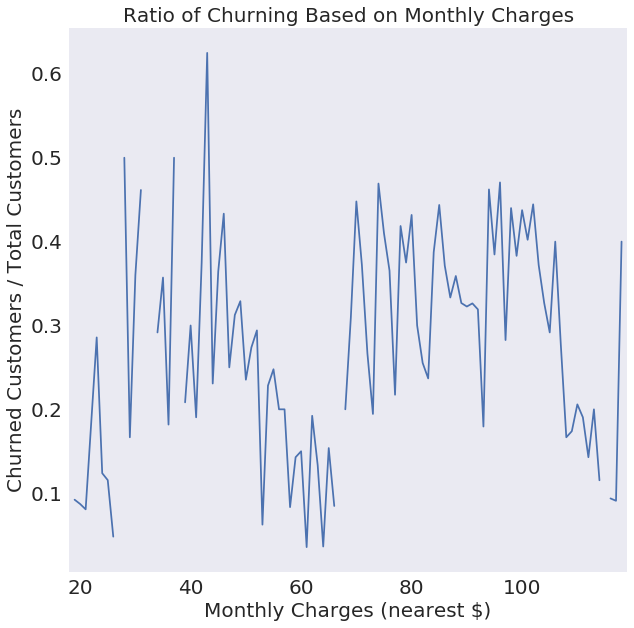

In [14]:
df.MonthlyCharges = df.MonthlyCharges.round()

MonthlyCharges_Churn = df[df.Churn == 'Yes'].groupby('MonthlyCharges').count()['customerID']
MonthlyCharges_NC = df.groupby('MonthlyCharges').count()['customerID']
MonthlyCharges_ratio = MonthlyCharges_Churn/MonthlyCharges_NC

MonthlyCharges_ratio.plot()
plt.title('Ratio of Churning Based on Monthly Charges',size =20)
plt.xlabel('Monthly Charges (nearest $)', size = 20)
_ = plt.ylabel('Churned Customers / Total Customers', size = 20)
plt.tick_params(labelsize=20)
plt.rcParams['figure.figsize']=(10,10)
fig.set_size_inches(18.5, 10.5)

* Monthly charges are rounded to the nearest dollar. It seems that there is a bimodal distribution for churning based on monthly charges. The two modes are around 30-40 and 70-100.

# Plot TotalCharges

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


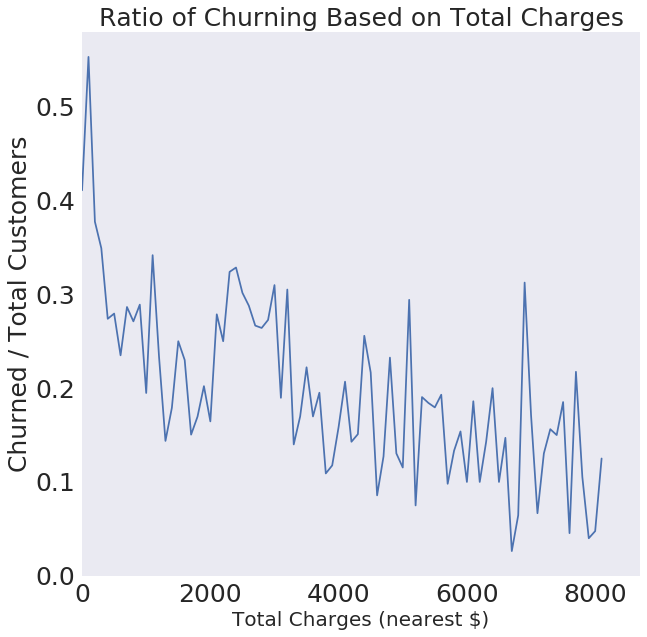

In [15]:
df['TotalCharges'] = df['TotalCharges'].astype(str)
df.TotalCharges = (pd.to_numeric(df.TotalCharges, errors='coerce')).round(decimals=-2)
TotalCharges_Churn = df[df.Churn == 'Yes'].groupby('TotalCharges').count()['customerID']
TotalCharges_NC = df.groupby('TotalCharges').count()['customerID']
TotalCharges_ratio = TotalCharges_Churn/TotalCharges_NC

TotalCharges_ratio.plot()
plt.title('Ratio of Churning Based on Total Charges',size =25)
plt.xlabel('Total Charges (nearest $)', size = 20)
_ = plt.ylabel('Churned / Total Customers', size = 25)
plt.tick_params(labelsize=25)
plt.rcParams['figure.figsize']=(10,10)
fig.set_size_inches(18.5, 10.5)

* Total charges are rounded to the nearest 100. There seems to be a downward trend line. It is possible that the people paying more are more sold on the products than their lower-paying counterparts.

# DEMOGRAPHICS FEATURES ANALYSIS

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


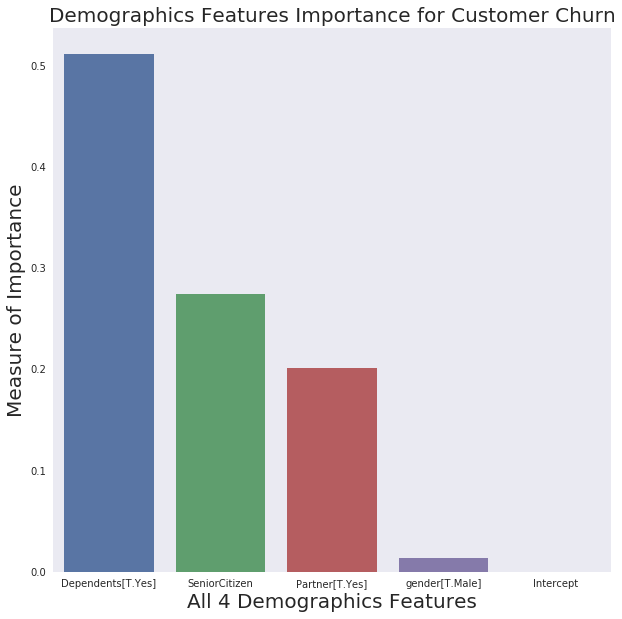

In [16]:
from patsy import dmatrices
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import seaborn as sns

formula = 'Churn ~ SeniorCitizen + Partner + Dependents + gender'

y, X = dmatrices(formula, df)

rf = DecisionTreeClassifier()
rf.fit(X,y)

temp = pd.DataFrame({'importance':rf.feature_importances_, 'feature': X.design_info.column_names})\
.sort_values('importance', ascending = False)
_ = sns.barplot(x = 'feature', y = 'importance', data = temp)
plt.rcParams['figure.figsize']=(10,10)
plt.tick_params(labelsize=10)
fig.set_size_inches(18.5, 10.5)

plt.title('Demographics Features Importance for Customer Churn',size =20)
plt.xlabel('All 4 Demographics Features', size = 20)
_ = plt.ylabel('Measure of Importance', size = 20)

In [17]:
Depend_Churn = df[df.Churn == 'Yes'].groupby('Dependents').count()['customerID']
Depend_NC = df.groupby('Dependents').count()['customerID']

print(Depend_Churn/Depend_NC)
print('Those without dependents are', round(0.312791/0.154502,2),'times likely to churn.')

Dependents
No     0.312791
Yes    0.154502
Name: customerID, dtype: float64
Those without dependents are 2.02 times likely to churn.


In [18]:
Seniors_Churn = df[df.Churn == 'Yes'].groupby('SeniorCitizen').count()['customerID']
Seniors_NC = df.groupby('SeniorCitizen').count()['customerID']

Senior_Ratio = Seniors_Churn/Seniors_NC
print(Senior_Ratio)
print('Seniors are', round(0.4168/0.2360,2),'times likely to churn.')

SeniorCitizen
0    0.236062
1    0.416813
Name: customerID, dtype: float64
Seniors are 1.77 times likely to churn.


In [21]:
Partner_Churn  = df[df.Churn == 'Yes'].groupby('Partner').count()['customerID']
Partner_NC = df.groupby('Partner').count()['customerID']

print(Partner_Churn/Partner_NC)
print('Singles are', round(0.329580/0.196649,2),'times likely to churn.')

Partner
No     0.329580
Yes    0.196649
Name: customerID, dtype: float64
Singles are 1.68 times likely to churn.


## Conclusions for Demographics:

Having dependents, being older and having partners seem to be the top three demographic factors affecting churn with 2.02 times likely to churn. 
Gender does not seem to be very important. Telco can advertise towards those who are married and/or have kids, 
since they become more long-term customers. Since seniors are 1.77 times likely to churn, Telco might think about 
advertising more heavily towards seniors and focus on senior customer retention.

# SERVICE FREATURE ANALYSIS

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


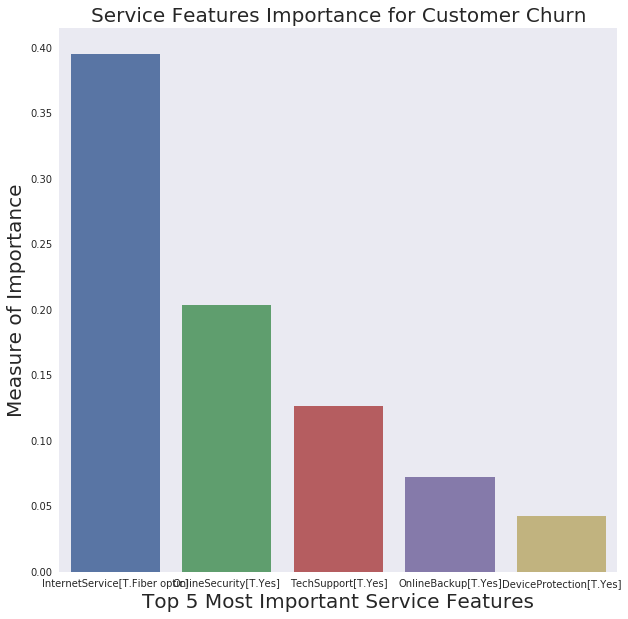

In [22]:
formula = 'Churn ~ PhoneService + MultipleLines + InternetService + OnlineBackup + OnlineSecurity + DeviceProtection + TechSupport + StreamingTV + StreamingMovies'

y, X = dmatrices(formula, df)

rf = DecisionTreeClassifier()
rf.fit(X,y)


temp = pd.DataFrame({'importance':rf.feature_importances_, 'feature': X.design_info.column_names})\
.sort_values('importance', ascending = False, na_position = 'first').head(5)
_ = sns.barplot(x = 'feature', y = 'importance', data = temp)
plt.rcParams['figure.figsize']=(10,10)
plt.tick_params(labelsize=10, rotation ='auto')

plt.title('Service Features Importance for Customer Churn',size =20)
plt.xlabel('Top 5 Most Important Service Features', size = 20)
_ = plt.ylabel('Measure of Importance', size = 20)

## Conclusions for Service Features:

Whether customers have Internet Service seems to be a significant factor. Those with Fiber Optic service seems to
churn quite a bit more than DSL, so service may need improvements in that area. Additionally, Fiber Optic customers
should be made aware than they can transfer to DSL. Additionally, whether 
customers have Internet Service with Telco affects if they will subscribe to other internet-related services. 
In general, it seems that those with fewer services tend to churn more. Bundle discounts may be a good way to upsell
and to retain customers. 

# ACCOUNT FEATURE

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


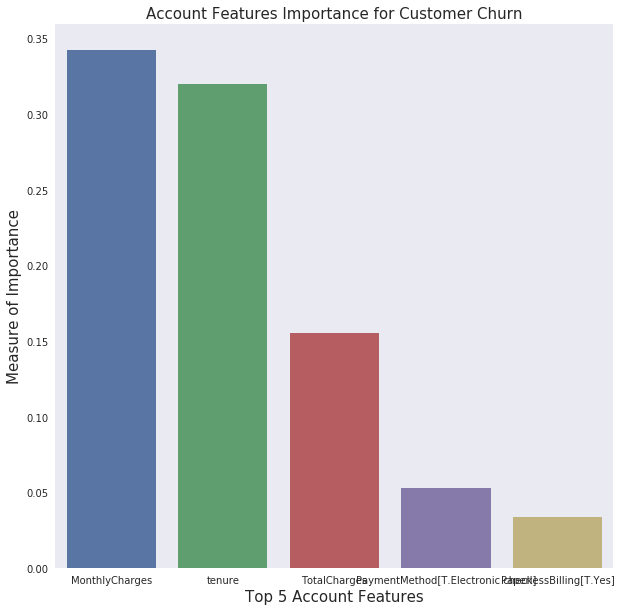

In [23]:
formula = 'Churn ~ tenure + MonthlyCharges + TotalCharges + Contract + PaperlessBilling + PaymentMethod'

y, X = dmatrices(formula, df)

rf = DecisionTreeClassifier()
rf.fit(X,y)

temp = pd.DataFrame({'importance':rf.feature_importances_, 'feature': X.design_info.column_names})\
.sort_values('importance', ascending = False, na_position = 'first').head(5)
_ = sns.barplot(x = 'feature', y = 'importance', data = temp)
plt.rcParams['figure.figsize']=(10,10)
plt.tick_params(labelsize=10, rotation ='auto')

plt.title('Account Features Importance for Customer Churn',size =15)
plt.xlabel('Top 5 Account Features', size = 15)
_ = plt.ylabel('Measure of Importance', size = 15)

## Conclusions for Account Features:

Interestingly, there is a bimodal distribution for churning based on monthly charges. The two modes are around 
$30-$40 and $70-$100. This may reflect an income disparity between the customers. Retention methods should reflect
the income levels of the customers. For total charges and tenure, there is a downward trend for churn rates, meaning,
the higher the customers pay and the longer they've remained customers, the less likely they are to churn. This 
indicates that customers remain loyal and those who pay more are generally satisfied with the service they're receiving.

# ALL FEATURES ANALYSIS

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


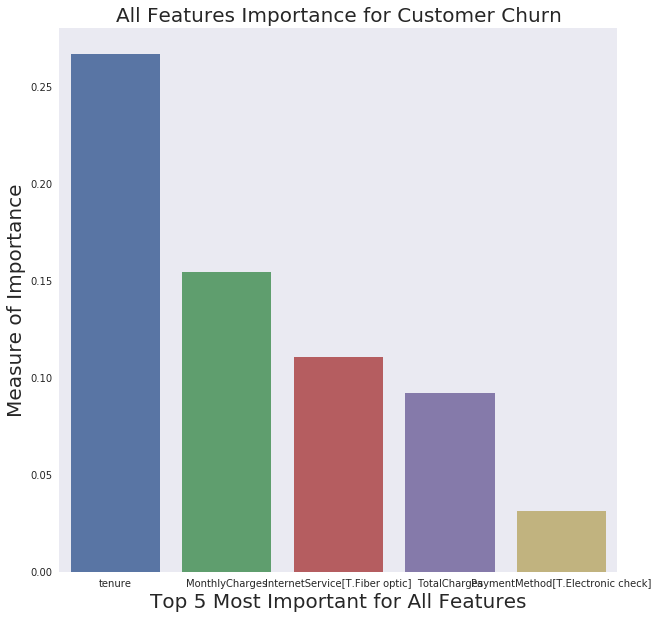

In [24]:
formula = 'Churn ~ tenure + MonthlyCharges + TotalCharges + Contract + PaperlessBilling + PaymentMethod + PhoneService + MultipleLines + InternetService + OnlineBackup + OnlineSecurity + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + SeniorCitizen + Partner + Dependents + gender'

y, X = dmatrices(formula, df)

rf = DecisionTreeClassifier()
rf.fit(X,y)

temp = pd.DataFrame({'importance':rf.feature_importances_, 'feature': X.design_info.column_names})\
.sort_values('importance', ascending = False, na_position = 'first').head(5)
_ = sns.barplot(x = 'feature', y = 'importance', data = temp)
plt.rcParams['figure.figsize']=(10,10)
plt.tick_params(labelsize=10, rotation ='auto')

plt.title('All Features Importance for Customer Churn',size =20)
plt.xlabel('Top 5 Most Important for All Features', size = 20)
_ = plt.ylabel('Measure of Importance', size = 20)

## Original Question:

Which customers are likely to leave and how can we proactively prevent that?


## Summary: 
After putting it all together, it seems that tenure is the single most important factor determining churn rates.
It seems that customer loyalty is very important and should be nurtured. When customers are happy with the service,
they are likely to stay longer and be okay to pay more.


## Future Reference:

For the future, it may be useful to gather more demographics data relating to income, lifestyle, and location. 
We can also measure the length of time customers remain with Telco as opposed churn rates in the past month.

# LOGISTIC REGRESSION SESSION

In [25]:
#Import Packages
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import seaborn as sns
%matplotlib inline

In [26]:
#Print multiple statements in same line#Print mu 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [27]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col]).codes

In [28]:
df1=df.dropna(how='any')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null int16
gender              7032 non-null int8
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int8
Dependents          7032 non-null int8
tenure              7032 non-null int64
PhoneService        7032 non-null int8
MultipleLines       7032 non-null int8
InternetService     7032 non-null int8
OnlineSecurity      7032 non-null int8
OnlineBackup        7032 non-null int8
DeviceProtection    7032 non-null int8
TechSupport         7032 non-null int8
StreamingTV         7032 non-null int8
StreamingMovies     7032 non-null int8
Contract            7032 non-null int8
PaperlessBilling    7032 non-null int8
PaymentMethod       7032 non-null int8
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int8
dtypes: float64(2), int16(1), int64(2), int8(16)
memory usage: 39

In [29]:
x_catg=df1.loc[:,('gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod')]

In [30]:
x_num=df1.loc[:,('SeniorCitizen','tenure','MonthlyCharges','TotalCharges')]

In [31]:
x_num1=pd.get_dummies(x_catg)

In [32]:
x=pd.concat([x_num1,x_num],axis=1)

In [33]:
y=df1['Churn']

In [34]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=1)

In [35]:
from  sklearn.linear_model  import LogisticRegression
log = LogisticRegression()

In [36]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
log.coef_

array([[ -5.88326024e-02,  -1.37234901e-02,  -1.54825980e-01,
         -4.94164788e-01,   1.03520477e-01,   1.47179179e-02,
         -2.24196576e-01,  -1.16381764e-01,  -9.27279233e-02,
         -2.25174431e-01,   2.64801025e-02,   4.02628708e-02,
         -6.97178696e-01,   2.89400871e-01,  -5.27912644e-02,
          2.37883680e-01,  -6.66455674e-02,   1.68904203e-02,
          3.80200346e-04]])

In [38]:
coeff = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))], axis=1)
coeff.columns = ("Variable","Coeff")
coeff.sort_values('Variable', ascending=True)

,Variable,Coeff
12,Contract,-0.697179
2,Dependents,-0.154826
8,DeviceProtection,-0.092728
5,InternetService,0.014718
17,MonthlyCharges,0.016890
4,MultipleLines,0.103520
7,OnlineBackup,-0.116382
6,OnlineSecurity,-0.224197
13,PaperlessBilling,0.289401
1,Partner,-0.013723


In [39]:
classes = log.predict(test_x)

In [40]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
auc = metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.804323094425
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.85      0.90      0.87      1294
          1       0.66      0.55      0.60       464

avg / total       0.80      0.80      0.80      1758

AUC


0.72123827479614133